## Day 5 working lunch exercise


You have 2 hours to complete this excercise. You may work together but each student should turn in their own copy of the exercise. We will grade on effort so please do your best to answer all the questions and work together!

Create a Python notebook to run and document your analysis. You can start with this notebook, or from another existing notebook. When finished, export the notebook and submit it to Blackboard.

1. The half-life of P-32 radioactive isotope is 14.32 days. If you receive a vial of P32 containing 1000 atoms, how many atoms do you have left after 7 days? Plot the radioactive decay function and calculate number of remaining atoms at 7 days. 

e**(-kt(half-life))=1/2

-kt=ln(1/2)

k=ln(1/2)/t(half)

In [6]:
##to get you started
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

##using the half-life given to calculate the rate of decay
k = math.log(2)/14.2
k 

0.048813181729573614

In [9]:
def decay(t, c, k=.0488131):
    rate = -k * c
    return rate



In [10]:
##initial conditions
c0 = 1000
tspan = [0, 7]
atoms=solve_ivp(decay, tspan, [c0], t_eval=[0, 1, 2, 3, 4, 5, 6, 7],args=(k,))
atoms



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [0 1 2 3 4 5 6 7]
        y: [[ 1.000e+03  9.524e+02  9.070e+02  8.638e+02  8.226e+02
              7.834e+02  7.461e+02  7.106e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0

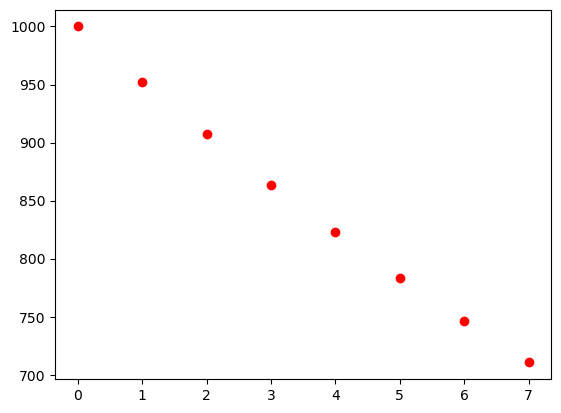

In [11]:
plt.plot(atoms.t, atoms.y[0], 'ro')

Answer:

2. You are tracking the growth of two bacterial strains over time. You notice that the two strains grow slightly differently, but what affect does strain have on the doubling time? To answer this, you will need to:
a) Tidy the following dataset and plot growth of the two samples
b) Fit a curve of exponential growth to the dataset
c) Use this curve to estimate growth rate and compare between the two. 

Data is in the file `TECANgrowth.csv`

In [12]:
import pandas as pd
data = pd.read_csv('/home/timp/bcmb_bootcamp/day4/data/TECANgrowth.csv')
data


,Unnamed: 0,0,10,20,30,40,50,60,70,80,...,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390
0,WT_0,0.2010,0.2165,0.2298,0.2429,0.2606,0.2809,0.3113,0.3467,0.3684,...,0.5284,0.5270,0.5273,0.5290,0.5267,0.5300,0.5287,0.5295,0.5328,0.5276
1,kd_0,0.1922,0.1970,0.2044,0.2122,0.2185,0.2297,0.2463,0.2661,0.2945,...,0.4359,0.4368,0.4374,0.4375,0.4362,0.4411,0.4380,0.4385,0.4374,0.4383


In [14]:
data = data.rename(columns={'Unnamed: 0': 'Sample'})
data

,Sample,0,10,20,30,40,50,60,70,80,...,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390
0,WT_0,0.2010,0.2165,0.2298,0.2429,0.2606,0.2809,0.3113,0.3467,0.3684,...,0.5284,0.5270,0.5273,0.5290,0.5267,0.5300,0.5287,0.5295,0.5328,0.5276
1,kd_0,0.1922,0.1970,0.2044,0.2122,0.2185,0.2297,0.2463,0.2661,0.2945,...,0.4359,0.4368,0.4374,0.4375,0.4362,0.4411,0.4380,0.4385,0.4374,0.4383


In [16]:
melty= pd.melt(data, id_vars='Sample', var_name='Time', value_name='Absorbance')
melty

,Sample,Time,Absorbance
0,WT_0,0,0.2010
1,kd_0,0,0.1922
2,WT_0,10,0.2165
3,kd_0,10,0.1970
4,WT_0,20,0.2298
...,...,...,...
275,kd_0,1370,0.4385
276,WT_0,1380,0.5328
277,kd_0,1380,0.4374
278,WT_0,1390,0.5276


In [24]:
melty.Time=melty.Time.astype(float)

In [17]:
import plotnine as p9

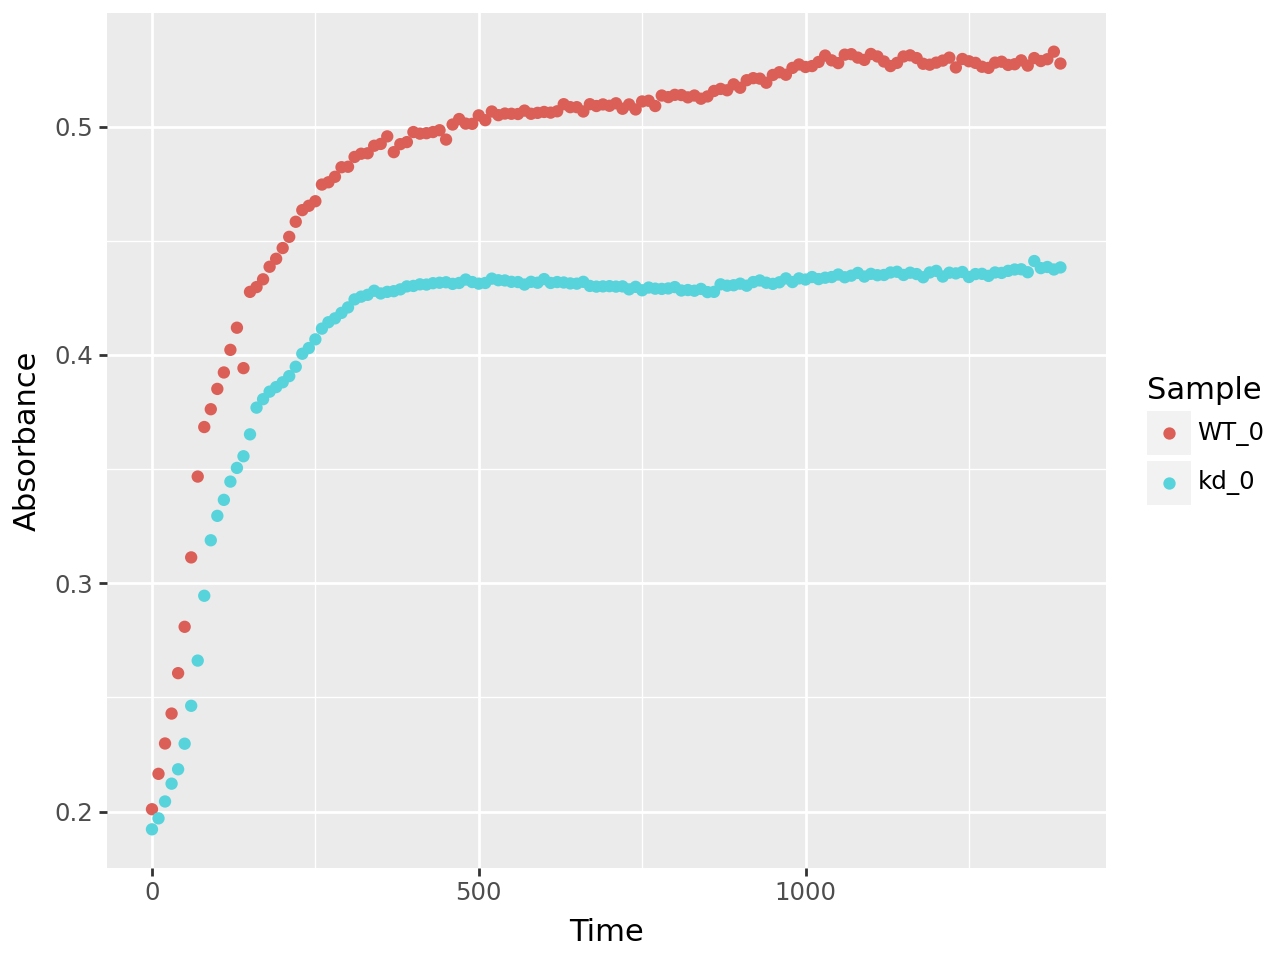

In [26]:
p9.ggplot(data=melty, mapping=p9.aes(x='Time', y='Absorbance', color='Sample'))+p9.geom_point()

In [28]:
def growth_rate(t,B, k=0.1, sat_time=300):
    if t <sat_time: 
        rate = k*B
    else:
        rate = 0
    return rate

In [39]:
list(tvals)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [47]:
b0=.2
tspan = [0, 2000] 
tvals=list(range(0,2000))
test_bac=solve_ivp(growth_rate, tspan, [b0], t_eval=tvals, args=(0.003, 300))
test_bac

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [   0    1 ... 1998 1999]
        y: [[ 2.000e-01  2.006e-01 ...  4.886e-01  4.886e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 74
     njev: 0
      nlu: 0

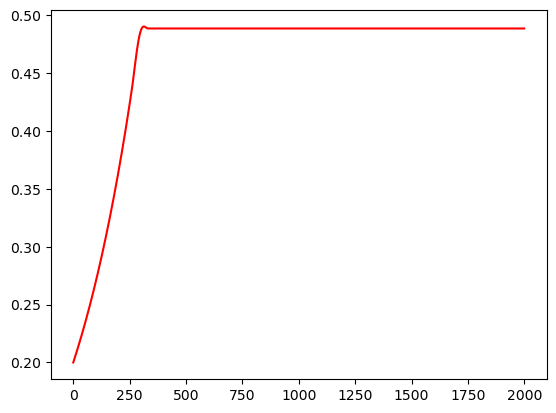

In [48]:
plt.plot(test_bac.t, test_bac.y[0], 'r-')

In [51]:
wtbac=melty[melty.Sample=='WT_0']
wtbac

,Sample,Time,Absorbance
0,WT_0,0.0,0.2010
2,WT_0,10.0,0.2165
4,WT_0,20.0,0.2298
6,WT_0,30.0,0.2429
8,WT_0,40.0,0.2606
...,...,...,...
270,WT_0,1350.0,0.5300
272,WT_0,1360.0,0.5287
274,WT_0,1370.0,0.5295
276,WT_0,1380.0,0.5328


In [52]:
from scipy.optimize import curve_fit

In [60]:
def mybac_growth(t, bac_growth=0.003, bac_sattime=300, bac_initial_abs=0.2):
    b0=bac_initial_abs
    tspan = [0, max(t)] 
    tvals=t
    test_bac=solve_ivp(growth_rate, tspan, [b0], t_eval=tvals, args=(bac_growth, bac_sattime))
    return test_bac.y[0]
    

In [61]:
mybac_growth(wtbac.Time)

array([0.2       , 0.20609091, 0.21236731, 0.21883486, 0.22549939,
       0.23236703, 0.23944387, 0.24673619, 0.25425052, 0.2619936 ,
       0.26997241, 0.27819414, 0.28666623, 0.29539636, 0.3043924 ,
       0.31366249, 0.32321498, 0.33305844, 0.34320169, 0.35365378,
       0.36442416, 0.37552254, 0.3869589 , 0.39874354, 0.41088708,
       0.42340045, 0.43631008, 0.45133944, 0.46666166, 0.47911508,
       0.48701145, 0.49013593, 0.48974712, 0.48857699, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856543,
       0.48856543, 0.48856543, 0.48856543, 0.48856543, 0.48856

In [58]:
wtbac.Time

0         0.0
2        10.0
4        20.0
6        30.0
8        40.0
        ...  
270    1350.0
272    1360.0
274    1370.0
276    1380.0
278    1390.0
Name: Time, Length: 140, dtype: float64

In [63]:
bac_param_wt, bac_param_wt_covar = curve_fit(mybac_growth, wtbac.Time, wtbac.Absorbance, p0=[0.003, 300, 0.2])
bac_param_wt

/tmp/ipykernel_2806462/322939880.py:1: OptimizeWarning: Covariance of the parameters could not be estimated


array([3.04870222e-03, 3.00000000e+02, 2.11487491e-01])

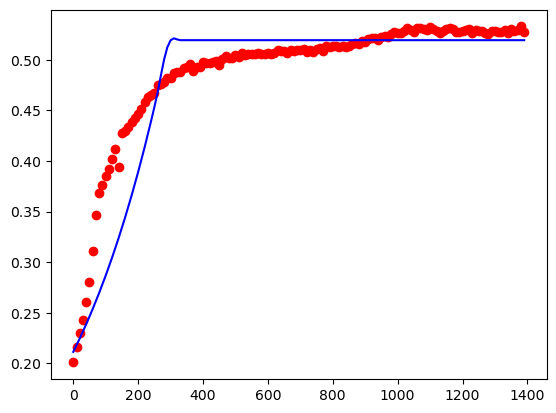

In [65]:
plt.plot(wtbac.Time, wtbac.Absorbance, 'ro')
plt.plot(wtbac.Time, mybac_growth(wtbac.Time, *bac_param_wt), 'b-')